In [8]:
#KNN分类模型
import pandas as pd
from sklearn.model_selection import train_test_split
#载入数据
#data = pd.read_csv("/Users/joseph/Desktop/《scikit-learn机器学习：常用算法原理及编程实战》_黄永昌/《scikit-learn机器学习：常用算法原理及编程实战》_黄永昌/scikit-learn机器学习源码/datasets/pima-indians-diabetes/diabetes.csv")
#拆分训练集与测试集
data = pd.read_csv("../8_train.csv")
X = data.iloc[0:2000,:-1]
Y = data.iloc[0:2000,-1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
#使用简单knn，带权重knn以及制定半径knn进行比较
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
#构造三个模型
models = []
models.append(("KNN",KNeighborsClassifier(n_neighbors=2)))
models.append(("KNN with weights",KNeighborsClassifier(n_neighbors=2,
                                                      weights="distance")))
models.append(("Radius Neighbors",RadiusNeighborsClassifier(n_neighbors=2,radius=500.0)))
#分别计算三个模型并计算评分
results = []
for name , model in models:
    model.fit(X_train,Y_train)
    results.append((name,model.score(X_test,Y_test)))
for i in results:
    print("name:  {},   score:  {}".format(i[0],i[1]))

name:  KNN,   score:  0.685
name:  KNN with weights,   score:  0.7016666666666667
name:  Radius Neighbors,   score:  0.5


In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#使用n折交叉验证进行更准确的验证
results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_resrult = cross_val_score(model , X , Y , cv=kfold)
    results.append((name,cv_resrult))
for i in results:
    print("name:  {},   score:  {}".format(i[0],i[1].mean()))
    

name:  KNN,   score:  0.7055
name:  KNN with weights,   score:  0.726
name:  Radius Neighbors,   score:  0.48349999999999993


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

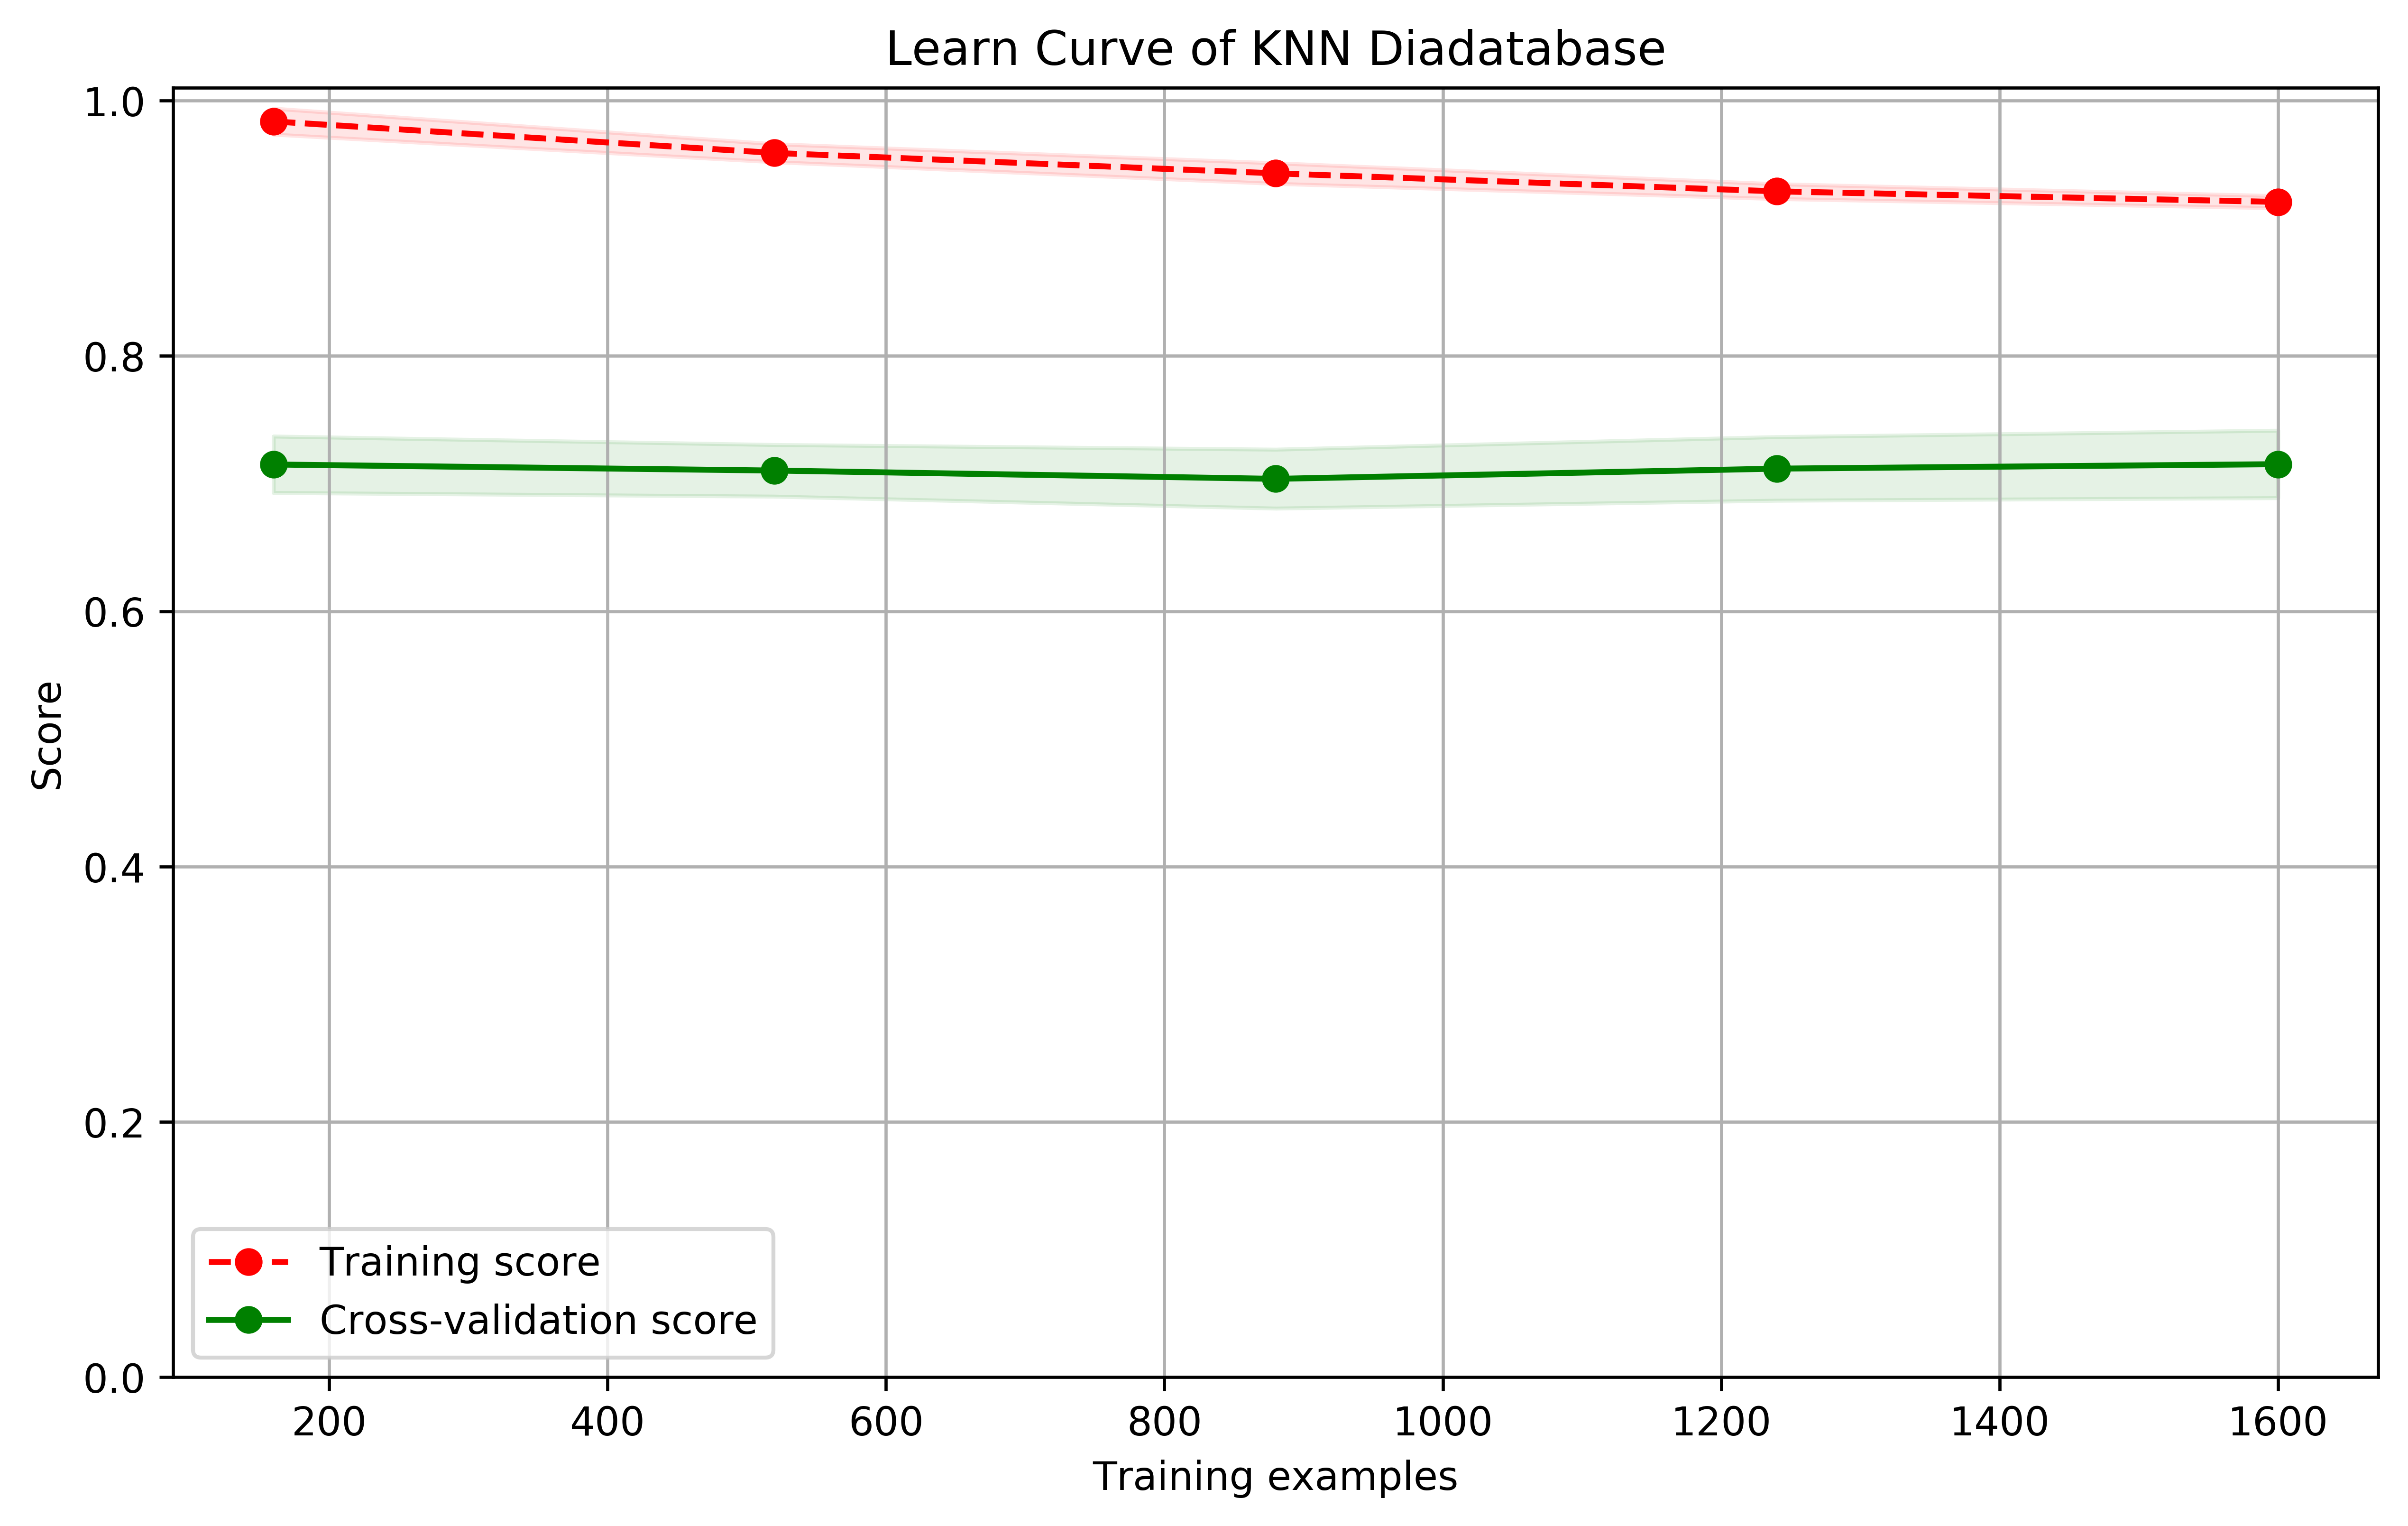

In [10]:
#画出模型的学习曲线
from sklearn.model_selection import ShuffleSplit
from commons.utils import plot_learning_curve
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2,weights="distance")
cv = ShuffleSplit(n_splits=10,test_size=.2,random_state=42)
plt.figure(figsize=(10,6),dpi=600)
plot_learning_curve(plt,knn,"Learn Curve of KNN Diadatabase",X,Y,ylim=(0.0,1.01),cv=cv)